In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/test.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
smoking_age = df[['Maternal Smoker', 'Maternal Age']]
smoking_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [4]:
smoker = smoking_age['Maternal Age'] [smoking_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [5]:
non_smoker = smoking_age['Maternal Age'] [smoking_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

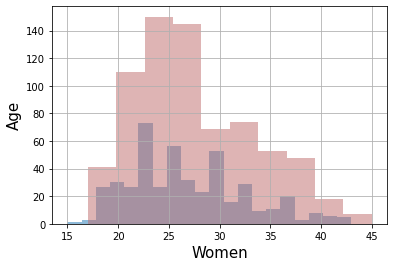

In [6]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

### 1. The distribution of the ages of mother who smoked appears to be nearly similar but slightly shifted to left when  compared to non-smoking mothers. 

### 2. We could use A/B testing in this type of problems

### 3. Null hypothesis: Maternal age is the same for mothers who don't smoke as for mothers who do.
### Alternative hypothesis: Mothers who smoke have a lower age, on average, than non-smoking mothers.

### 4. **Test statistic** - We will do the subtraction in the order "average age of the smoking group - average age of the non-smoking group". Smaller values of this statistic will favor the alternative hypothesis

In [7]:
means_table = smoking_age.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


### 5. From below, Observed difference = -0.8076725017901509

In [8]:
difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
difference

-0.8076725017901509

### 6. The below will simulate you 5000 random samples with shuffled maternal ages.

In [9]:
import numpy as np
import array
diffs = np.zeros(5000)
for i in np.arange(5000):
    smoking_age = df[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_age.sample(1174,replace = False)
    shuffled_ages = shuffled['Maternal Age']
    original_and_shuffled = smoking_age.assign(shuffled_ages=shuffled_ages.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    diff = all_group_means['shuffled_ages'][0]- all_group_means['shuffled_ages'][1]
    diffs[i] = diff
diffs

array([ 0.40702043,  0.26393041, -0.71265902, ...,  0.18523089,
        0.71824124,  0.38197968])

In [10]:

diffs_df = pd.DataFrame(diffs)
diffs_df

,0
0,0.407020
1,0.263930
2,-0.712659
3,-0.247616
4,-0.011518
...,...
4995,-0.365666
4996,0.085068
4997,0.185231
4998,0.718241


### 7. The below is the histogram of the model of random selection predicts about the statistic.

Observed Difference: -0.8076725017901509


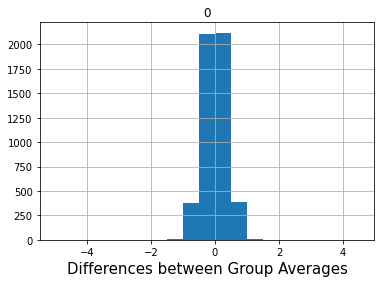

In [11]:
diffs_df.hist(bins = np.arange(-5,5,0.5))
plt.xlabel('Differences between Group Averages',fontsize=15)
print('Observed Difference:', difference)

### 8. the p-value can be found from the below.

In [12]:
np.count_nonzero(diffs <= difference)/diffs.size

0.0106

### 9. Since the p-value of the given sample is less than 0.05 the null hypothesis is rejected.